# Replication of the paper _Application of machine learning in algorithmic investment strategies on global stock markets_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from model_building import rolling_window_regression, rolling_window_elm_regression, rolling_window_bglm_regression
from feature_generation import calculate_sma_signal, get_stochastic_oscillator, get_rsi, get_wpr, calculate_macd_signal, min_max_normalize
from metrics import cagr, adj_sr, calculate_sortino_ratio, calculate_mdd, calculate_information_ratio
import numpy as np

In [2]:
df_wig20 = pd.read_excel(f"wig20.xlsx")
df_dax = pd.read_excel(f"DAX.xlsx")
df_spx = pd.read_excel(f"S&P500.xlsx")

In [3]:
df_wig20['Date'] = pd.to_datetime(df_wig20['Date'])
df_wig20.set_index('Date', inplace=True)

df_dax['Date'] = pd.to_datetime(df_dax['Date'])
df_dax.set_index('Date', inplace=True)

df_spx['Date'] = pd.to_datetime(df_spx['Date'])
df_spx.set_index('Date', inplace=True)

In [4]:
df_wig20 = df_wig20.sort_index()
df_dax = df_dax.sort_index()
df_spx = df_spx.sort_index()

In [5]:
start_date = '2002-01-02'
end_date = '2023-03-31'

df_wig20 = df_wig20.loc[start_date:end_date]
df_dax = df_dax.loc[start_date:end_date]
df_spx = df_spx.loc[start_date:end_date]

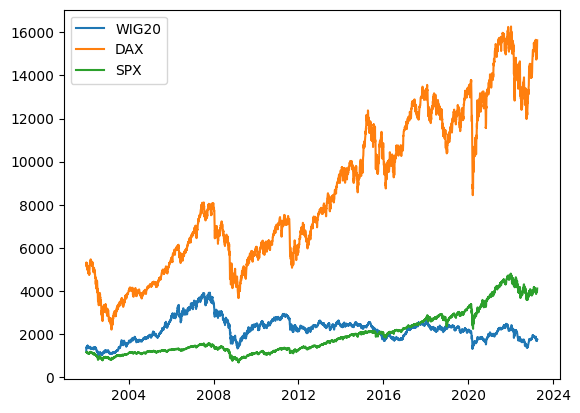

In [6]:
plt.plot(df_wig20, label='WIG20')
plt.plot(df_dax, label='DAX')
plt.plot(df_spx, label='SPX')
plt.legend()

## Target variable

In [7]:
df_wig20['discrete_return'] = (df_wig20['Price'] - df_wig20['Price'].shift(1))/df_wig20['Price'].shift(1)
df_dax['discrete_return'] = (df_dax['Price'] - df_dax['Price'].shift(1))/df_dax['Price'].shift(1)
df_spx['discrete_return'] = (df_spx['Price'] - df_spx['Price'].shift(1))/df_spx['Price'].shift(1)

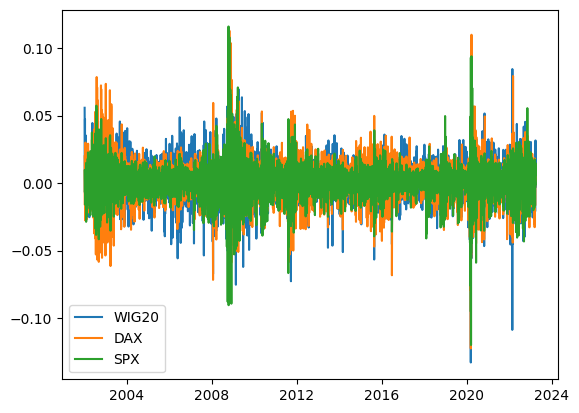

In [8]:
plt.plot(df_wig20['discrete_return'], label='WIG20')
plt.plot(df_dax['discrete_return'], label='DAX')
plt.plot(df_spx['discrete_return'], label='SPX')
plt.legend()

## Features

In [9]:
df_wig20['Price'] = df_wig20['Price'].shift(1)
df_dax['Price'] = df_dax['Price'].shift(1)
df_spx['Price'] = df_spx['Price'].shift(1)

### SMA signal

In [10]:
df_wig20 = calculate_sma_signal(df_wig20, 14)
df_dax = calculate_sma_signal(df_dax, 14)
df_spx = calculate_sma_signal(df_spx, 14)

### MACD

In [11]:
df_wig20 = calculate_macd_signal(df_wig20)
df_dax = calculate_macd_signal(df_dax)
df_spx = calculate_macd_signal(df_spx)

### STOCH

In [12]:
df_wig20 = get_stochastic_oscillator(df_wig20)
df_dax = get_stochastic_oscillator(df_dax)
df_spx = get_stochastic_oscillator(df_spx)

### RSI

In [13]:
df_wig20 = get_rsi(df_wig20)
df_dax = get_rsi(df_dax)
df_spx = get_rsi(df_spx)

### WPR

In [14]:
df_wig20 = get_wpr(df_wig20)
df_dax = get_wpr(df_dax)
df_spx = get_wpr(df_spx)

In [15]:
df_wig20

Price  discrete_return  SMA_signal  MACD_signal  best_low  \
Date                                                                      
2002-01-02      NaN              NaN         NaN          NaN       NaN   
2002-01-03  1217.32         0.055721         NaN -1217.320000       NaN   
2002-01-04  1285.15         0.036906         NaN -1236.296940       NaN   
2002-01-07  1332.58         0.015947         NaN -1264.597007       NaN   
2002-01-08  1353.83        -0.007468         NaN -1292.898274       NaN   
...             ...              ...         ...          ...       ...   
2023-03-27  1670.18         0.010047  -75.504286 -1670.496618   1670.18   
2023-03-28  1686.96         0.004244  -46.835714 -1665.106100   1670.18   
2023-03-29  1694.12         0.009014  -27.767857 -1663.291976   1670.18   
2023-03-30  1709.39         0.031532   -3.458571 -1666.578076   1670.18   
2023-03-31  1763.29        -0.002682   53.033571 -1684.698697   1670.18   

            best_high      fast_k  fast_d  slow_k  slow_d        rsi       wpr  
Date                                                                            
2002-01-02        NaN         NaN     NaN     NaN     NaN        NaN       NaN  
2002-01-03        NaN         NaN     NaN     NaN     NaN        NaN       NaN  
2002-01-04        NaN         NaN     NaN     NaN     NaN        NaN       NaN  
2002-01-07        NaN         NaN     NaN     NaN     NaN        NaN       NaN  
2002-01-08        NaN         NaN     NaN     NaN     NaN        NaN       NaN  
...               ...         ...     ...     ...     ...        ...       ...  
2023-03-27    1860.83    0.000000    9.70    9.70   13.26  16.571917  1.000000  
2023-03-28    1860.83    8.801469    7.67    7.67   11.35  22.339294  0.911985  
2023-03-29    1835.94   14.442568    7.75    7.75    8.37  22.269537  0.855574  
2023-03-30    1799.58   30.301391   17.85   17.85   11.09  28.253772  0.696986  
2023-03-31    1763.29  100.000000   48.25   48.25   24.62  44.118505  0.000000  

[5325 rows x 12 columns]

### Shaping

In [16]:
df_wig20 = df_wig20.loc['2002-03-06':end_date]
df_dax = df_dax.loc['2002-03-07':end_date]
df_spx = df_spx.loc['2002-04-12':end_date]

In [17]:
df_wig20 = df_wig20[['discrete_return', 'SMA_signal',	'MACD_signal',	'fast_k',	'fast_d',	'slow_d',	'rsi',	'wpr']]
df_dax = df_dax[['discrete_return', 'SMA_signal',	'MACD_signal',	'fast_k',	'fast_d',	'slow_d',	'rsi',	'wpr']]
df_spx = df_spx[['discrete_return', 'SMA_signal',	'MACD_signal',	'fast_k',	'fast_d',	'slow_d',	'rsi',	'wpr']]

### Min-max Normalization

In [18]:
columns_to_normalize = ['SMA_signal', 'MACD_signal', 'fast_k', 'fast_d', 'slow_d', 'rsi', 'wpr']


In [19]:
df_wig20[columns_to_normalize] = df_wig20[columns_to_normalize].apply(min_max_normalize)
df_dax[columns_to_normalize] = df_dax[columns_to_normalize].apply(min_max_normalize)
df_spx[columns_to_normalize] = df_spx[columns_to_normalize].apply(min_max_normalize)

In [20]:
df_wig20

discrete_return  SMA_signal  MACD_signal    fast_k  fast_d  \
Date                                                                     
2002-03-06        -0.006448    0.704332     0.876593  0.869856  0.9566   
2002-03-07         0.016976    0.691044     0.876497  0.727113  0.8657   
2002-03-08         0.003729    0.722275     0.874175  1.000000  0.8657   
2002-03-11        -0.020687    0.724517     0.871843  1.000000  0.9090   
2002-03-12        -0.022749    0.678178     0.872819  0.607706  0.8692   
...                     ...         ...          ...       ...     ...   
2023-03-27         0.010047    0.562037     0.776751  0.000000  0.0970   
2023-03-28         0.004244    0.604239     0.778608  0.088015  0.0767   
2023-03-29         0.009014    0.632309     0.779232  0.144426  0.0775   
2023-03-30         0.031532    0.668094     0.778101  0.303014  0.1785   
2023-03-31        -0.002682    0.751255     0.771861  1.000000  0.4825   

            slow_d       rsi       wpr  
Date                                    
2002-03-06  0.8879  0.528409  0.130144  
2002-03-07  0.9032  0.523329  0.272887  
2002-03-08  0.8960  0.614711  0.000000  
2002-03-11  0.8801  0.691160  0.000000  
2002-03-12  0.8813  0.617125  0.392294  
...            ...       ...       ...  
2023-03-27  0.1326  0.169692  1.000000  
2023-03-28  0.1135  0.230063  0.911985  
2023-03-29  0.0837  0.229333  0.855574  
2023-03-30  0.1109  0.291974  0.696986  
2023-03-31  0.2462  0.458041  0.000000  

[5280 rows x 8 columns]

In [21]:
df_wig20['target_NB'] = df_wig20['discrete_return'].apply(lambda x: 1 if x > 0 else -1)
df_dax['target_NB'] = df_dax['discrete_return'].apply(lambda x: 1 if x > 0 else -1)
df_spx['target_NB'] = df_spx['discrete_return'].apply(lambda x: 1 if x > 0 else -1)

In [22]:
columns = ['SMA_signal', 'MACD_signal', 'fast_k', 'fast_d', 'slow_d', 'rsi', 'wpr']

In [23]:
model_types = ['KNN', 'Random_Forest', 'Decision_Tree', 'SVM_Linear', 'SVM_Polynomial', 'Naive_Bayes', 'ELM_tanh', 'BGLM_Logit']

for df in [df_wig20, df_dax, df_spx]:
    for model_type in model_types:
        df[model_type] = np.nan

In [24]:
for df in [df_wig20, df_dax, df_spx]:
    for model_type in model_types:
        if model_type != 'ELM_tanh' and model_type != 'BGLM_Logit':
            rolling_window_regression(df=df, columns=columns, model_type=model_type)
    rolling_window_elm_regression(df=df, columns=columns, activation='tanh')
    rolling_window_bglm_regression(df=df, columns=columns)

## WIG20. Cumulative Returns

#### Naive Bayes

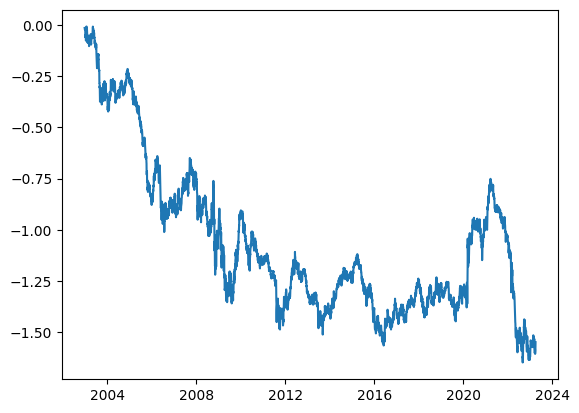

In [25]:
plt.plot(df_wig20['cumulative_return_Naive_Bayes'])

#### KNN

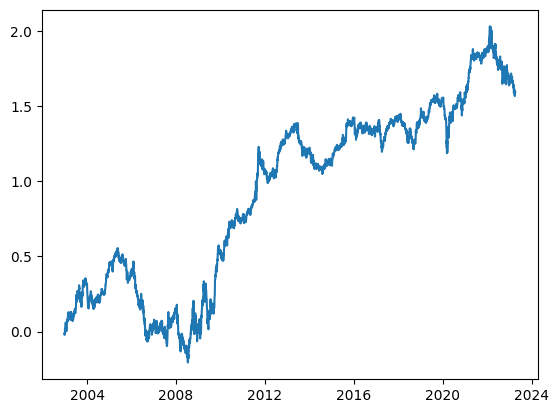

In [26]:
plt.plot(df_wig20['cumulative_return_KNN'])

#### Random Forest

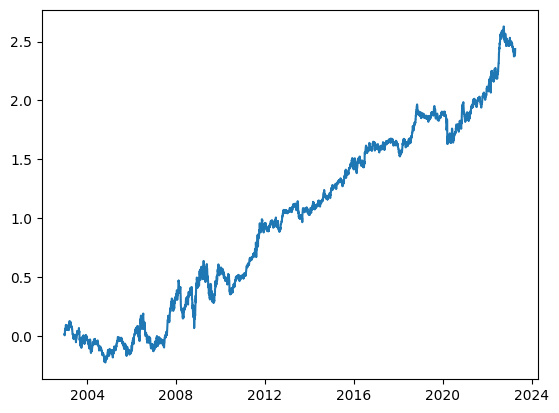

In [27]:
plt.plot(df_wig20['cumulative_return_Random_Forest'])

#### Regression Tree

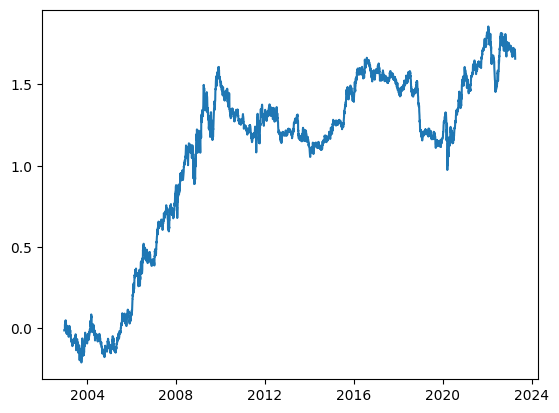

In [28]:
plt.plot(df_wig20['cumulative_return_Decision_Tree'])

#### Support Vector Machine Linear

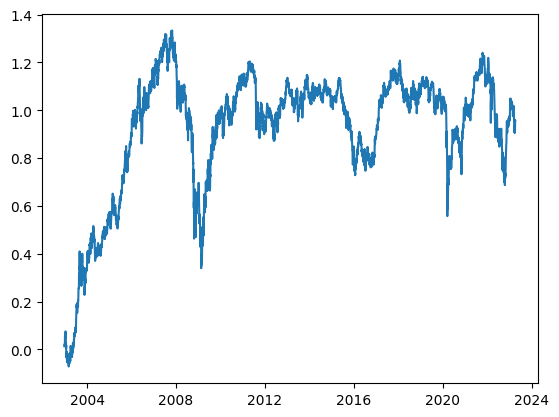

In [29]:
plt.plot(df_wig20['cumulative_return_SVM_Linear'])

#### Support Vector Machine Polynomial

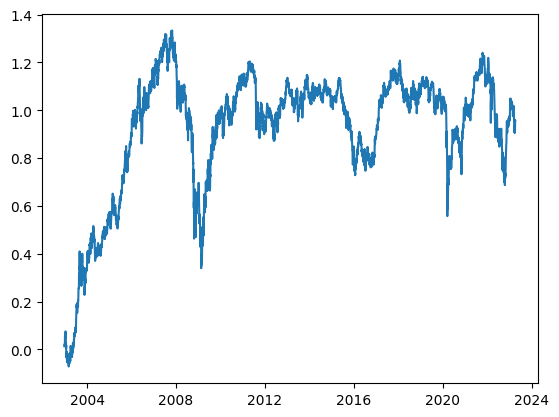

In [30]:
plt.plot(df_wig20['cumulative_return_SVM_Polynomial'])

#### Neural Networks

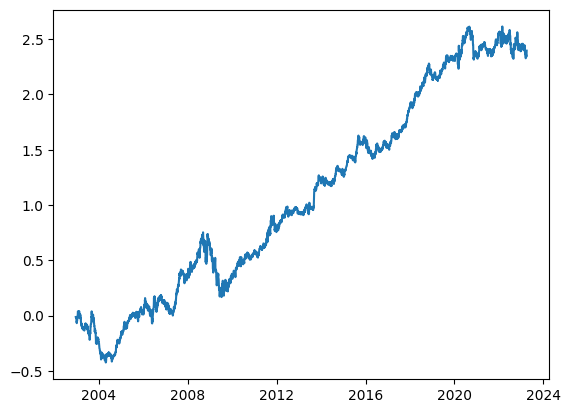

In [31]:
plt.plot(df_wig20['cumulative_return_ELM_tanh'])

#### Bayesian Generalized Linear Model

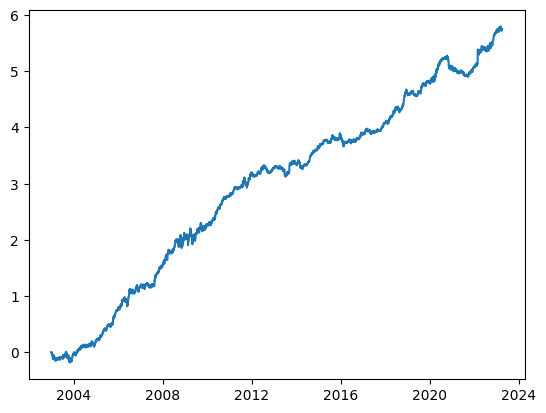

In [32]:
plt.plot(df_wig20['cumulative_return_BGLM_Logit'])

## DAX. Cumulative Returns

#### Naive Bayes

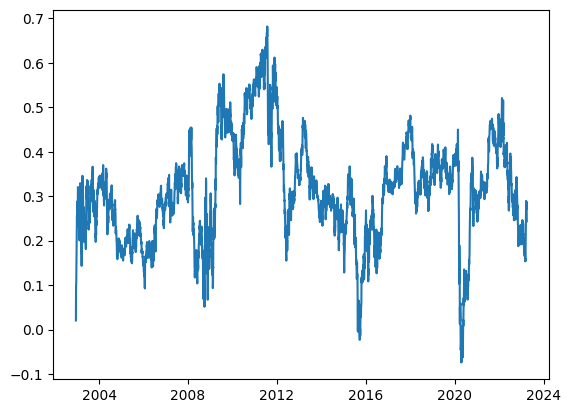

In [33]:
plt.plot(df_dax['cumulative_return_Naive_Bayes'])

#### KNN

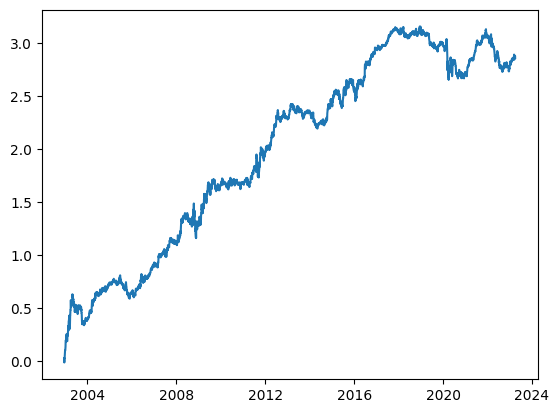

In [34]:
plt.plot(df_dax['cumulative_return_KNN'])

#### Random Forest

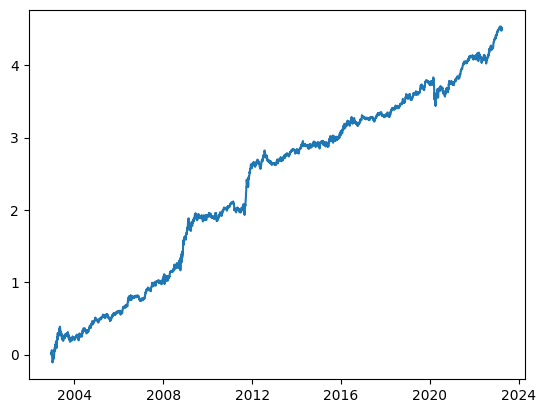

In [35]:
plt.plot(df_dax['cumulative_return_Random_Forest'])

#### Regression Tree

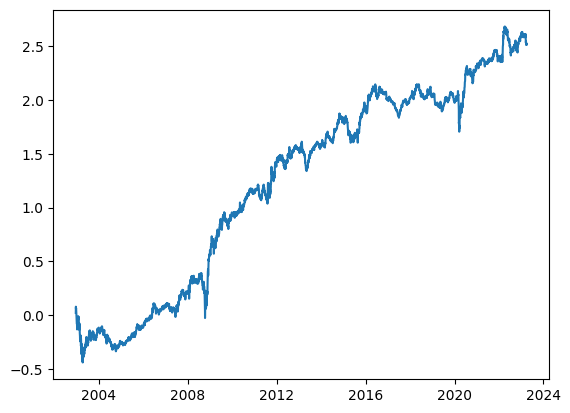

In [36]:
plt.plot(df_dax['cumulative_return_Decision_Tree'])

#### Support Vector Machine Linear

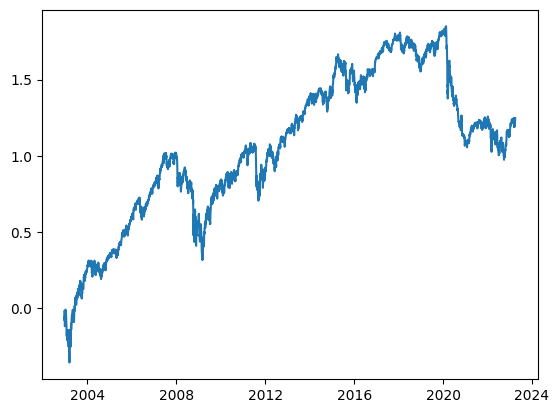

In [37]:
plt.plot(df_dax['cumulative_return_SVM_Linear'])

#### Support Vector Machine Polynomial

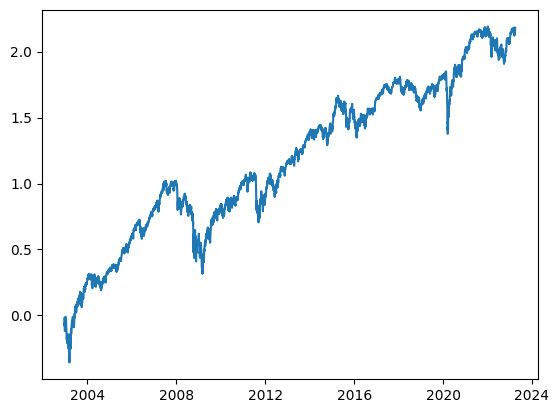

In [38]:
plt.plot(df_dax['cumulative_return_SVM_Polynomial'])

#### Neural Networks

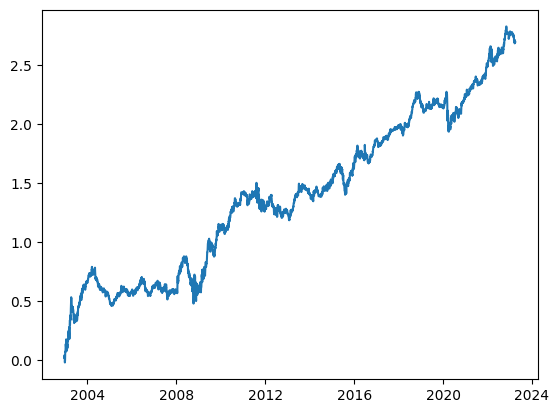

In [39]:
plt.plot(df_dax['cumulative_return_ELM_tanh'])

#### Bayesian Generalized Linear Model

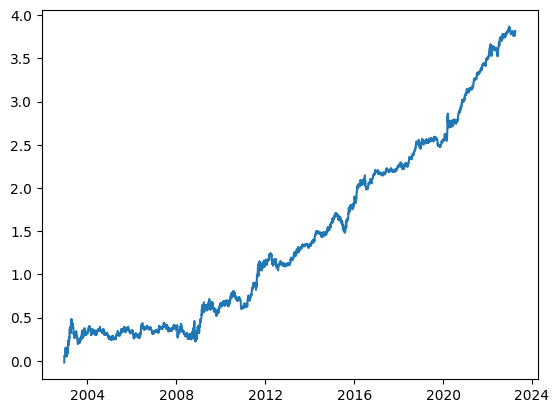

In [40]:
plt.plot(df_dax['cumulative_return_BGLM_Logit'])

## SPX. Cumulative Returns

#### Naive Bayes

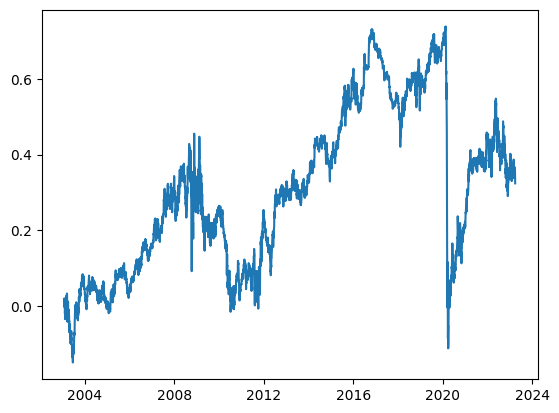

In [41]:
plt.plot(df_spx['cumulative_return_Naive_Bayes'])

#### KNN


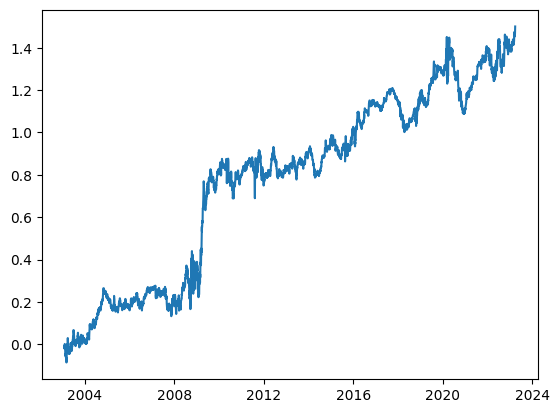

In [42]:
plt.plot(df_spx['cumulative_return_KNN'])

#### Random Forest

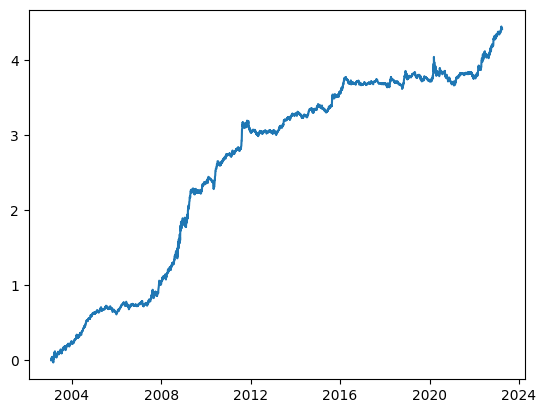

In [43]:
plt.plot(df_spx['cumulative_return_Random_Forest'])

#### Regression Tree

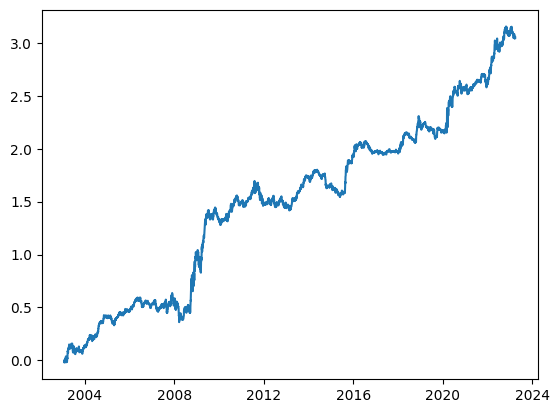

In [44]:
plt.plot(df_spx['cumulative_return_Decision_Tree'])

#### Support Vector Machine Linear

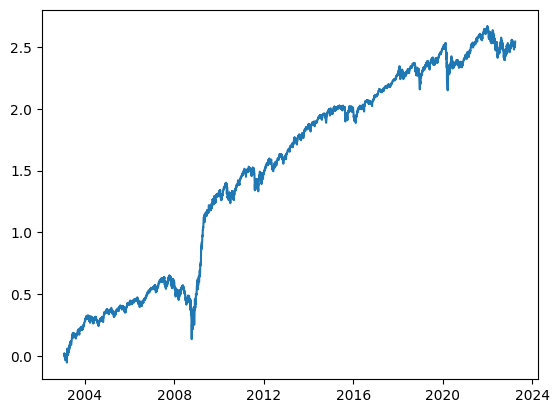

In [45]:
plt.plot(df_spx['cumulative_return_SVM_Linear'])

#### Support Vector Machine Polynomial


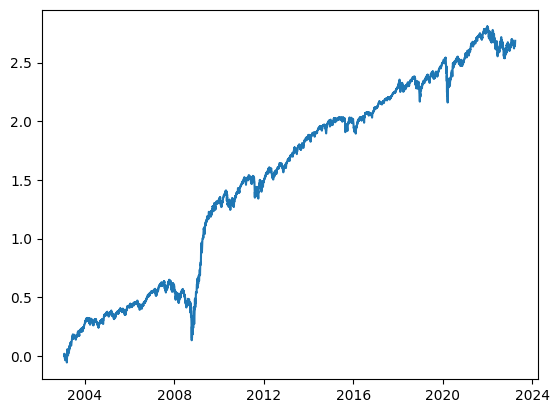

In [46]:
plt.plot(df_spx['cumulative_return_SVM_Polynomial'])

#### Neural Networks


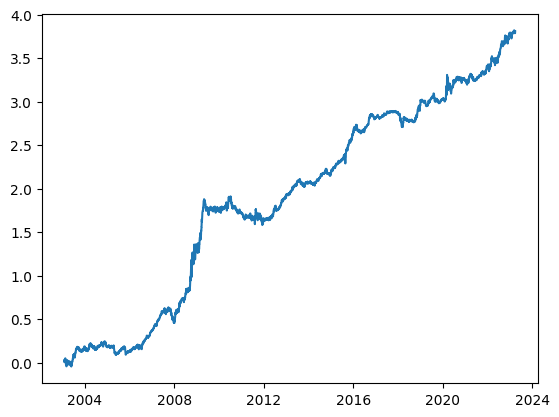

In [47]:
plt.plot(df_spx['cumulative_return_ELM_tanh'])

#### Bayesian Generalized Linear Model

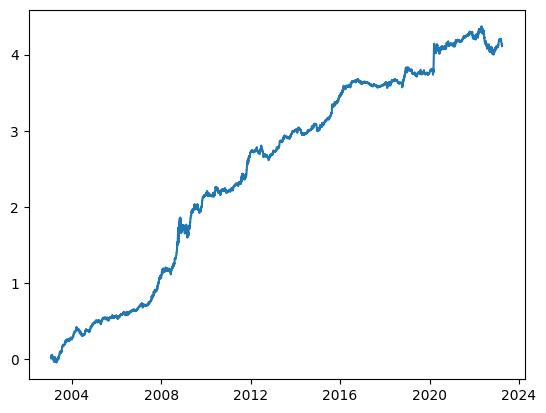

In [48]:
plt.plot(df_spx['cumulative_return_BGLM_Logit'])

## Risk and return measures

#### CAGR

In [49]:
for model in model_types:
    cumulative_return_col = 'cumulative_return_' + model
    cagr_wig20 = cagr(df_wig20, cumulative_return_col)
    cagr_dax = cagr(df_dax, cumulative_return_col)
    cagr_spx = cagr(df_spx, cumulative_return_col)
    print(f"CAGR for {model} on WIG20: {cagr_wig20 * 100}")
    print(f"CAGR for {model} on DAX: {cagr_dax * 100}")
    print(f"CAGR for {model} on SPX: {cagr_spx * 100}")
    print()

CAGR for KNN on WIG20: 2.3220513026937617
CAGR for KNN on DAX: 5.308720969448544
CAGR for KNN on SPX: 2.0305098721873804

CAGR for Random_Forest on WIG20: 4.488777668997979
CAGR for Random_Forest on DAX: 7.692205904399718
CAGR for Random_Forest on SPX: 7.631345257011346

CAGR for Decision_Tree on WIG20: 2.524662357250107
CAGR for Decision_Tree on DAX: 4.659156048270763
CAGR for Decision_Tree on SPX: 5.674052956970188

CAGR for SVM_Linear on WIG20: -0.21539749013406162
CAGR for SVM_Linear on DAX: 1.0959818232084917
CAGR for SVM_Linear on SPX: 4.7350989620710715

CAGR for SVM_Polynomial on WIG20: -0.21539749013406162
CAGR for SVM_Polynomial on DAX: 3.915228305878604
CAGR for SVM_Polynomial on SPX: 5.014589801269631

CAGR for Naive_Bayes on WIG20: -2.182707973602893
CAGR for Naive_Bayes on DAX: -6.725973492524395
CAGR for Naive_Bayes on SPX: -5.432265522774948

CAGR for ELM_tanh on WIG20: 4.402867444495584
CAGR for ELM_tanh on DAX: 5.004123994887477
CAGR for ELM_tanh on SPX: 6.85003118640

#### Adjusted Sharpe Ratio

In [50]:
for model in model_types:
        
    cumulative_return_col = 'cumulative_return_' + model
    returns_wig20 = (df_wig20['discrete_return'] * df_wig20[model])[200:]
    returns_dax = (df_dax['discrete_return'] * df_dax[model])[200:]
    returns_spx = (df_spx['discrete_return'] * df_spx[model])[200:]
    
    asr_wig20 = adj_sr(df_wig20, cumulative_return_col, returns_wig20)
    asr_dax = adj_sr(df_dax, cumulative_return_col, returns_dax)
    asr_spx = adj_sr(df_spx, cumulative_return_col, returns_spx)
    
    print(f"Adjusted Sharpe Ratio for {model} on WIG20: {asr_wig20 * 100}")
    print(f"Adjusted Sharpe Ratio for {model} on DAX: {asr_dax * 100}")
    print(f"Adjusted Sharpe Ratio for {model} on SPX: {asr_spx * 100}")
    print()

Adjusted Sharpe Ratio for KNN on WIG20: 19.245830175678766
Adjusted Sharpe Ratio for KNN on DAX: 28.93480390969164
Adjusted Sharpe Ratio for KNN on SPX: 21.636091997236054

Adjusted Sharpe Ratio for Random_Forest on WIG20: 25.04299824851194
Adjusted Sharpe Ratio for Random_Forest on DAX: 36.87764002371609
Adjusted Sharpe Ratio for Random_Forest on SPX: 41.40525216383571

Adjusted Sharpe Ratio for Decision_Tree on WIG20: 18.931124783892443
Adjusted Sharpe Ratio for Decision_Tree on DAX: 25.795276593622845
Adjusted Sharpe Ratio for Decision_Tree on SPX: 32.327081588303265

Adjusted Sharpe Ratio for SVM_Linear on WIG20: 12.158654183769482
Adjusted Sharpe Ratio for SVM_Linear on DAX: 15.613324162956662
Adjusted Sharpe Ratio for SVM_Linear on SPX: 28.6892227421017

Adjusted Sharpe Ratio for SVM_Polynomial on WIG20: 12.158654183769482
Adjusted Sharpe Ratio for SVM_Polynomial on DAX: 22.50510539890008
Adjusted Sharpe Ratio for SVM_Polynomial on SPX: 29.448649794219918

Adjusted Sharpe Ratio f

#### Sortino Ratio

In [51]:
for model in model_types:
        
    cumulative_return_col = 'cumulative_return_' + model
    returns_wig20 = (df_wig20['discrete_return'] * df_wig20[model])[200:]
    returns_dax = (df_dax['discrete_return'] * df_dax[model])[200:]
    returns_spx = (df_spx['discrete_return'] * df_spx[model])[200:]
    
    asr_wig20 = calculate_sortino_ratio(returns_wig20, 365)
    asr_dax = calculate_sortino_ratio(returns_dax, 365)
    asr_spx = calculate_sortino_ratio(returns_spx, 365)
    
    print(f"Sortino Ratio for {model} on WIG20: {asr_wig20}")
    print(f"Sortino Ratio Ratio for {model} on DAX: {asr_dax}")
    print(f"Sortino Ratio Ratio for {model} on SPX: {asr_spx}")
    print()

Sortino Ratio for KNN on WIG20: 0.08256282069598762
Sortino Ratio Ratio for KNN on DAX: 0.19273296548688218
Sortino Ratio Ratio for KNN on SPX: 0.10160667442488167

Sortino Ratio for Random_Forest on WIG20: 0.1476386781572766
Sortino Ratio Ratio for Random_Forest on DAX: 0.34703188029412596
Sortino Ratio Ratio for Random_Forest on SPX: 0.4238499726761695

Sortino Ratio for Decision_Tree on WIG20: 0.08544757076478121
Sortino Ratio Ratio for Decision_Tree on DAX: 0.1640717762119655
Sortino Ratio Ratio for Decision_Tree on SPX: 0.25577795605629283

Sortino Ratio for SVM_Linear on WIG20: 0.029361435361107864
Sortino Ratio Ratio for SVM_Linear on DAX: 0.054149556370790115
Sortino Ratio Ratio for SVM_Linear on SPX: 0.19442530680856782

Sortino Ratio for SVM_Polynomial on WIG20: 0.029361435361107864
Sortino Ratio Ratio for SVM_Polynomial on DAX: 0.12536161646357388
Sortino Ratio Ratio for SVM_Polynomial on SPX: 0.2065773358282822

Sortino Ratio for Naive_Bayes on WIG20: 0.0
Sortino Ratio Rati

In [52]:
for model in model_types:
  cumulative_return_col = 'cumulative_return_' + model
  returns_wig20 = (df_wig20['discrete_return'] * df_wig20[model])[200:]
  returns_dax = (df_dax['discrete_return'] * df_dax[model])[200:]
  returns_spx = (df_spx['discrete_return'] * df_spx[model])[200:]

  mdd_wig20 = calculate_mdd(returns_wig20)
  mdd_dax = calculate_mdd(returns_dax)
  mdd_spx = calculate_mdd(returns_spx)

  print(f"Maximum Drawdown for {model} on WIG20: {mdd_wig20:.2f}%")
  print(f"Maximum Drawdown for {model} on DAX: {mdd_dax:.2f}%")
  print(f"Maximum Drawdown for {model} on SPX: {mdd_spx:.2f}%")
  print()

Maximum Drawdown for KNN on WIG20: 18.96%
Maximum Drawdown for KNN on DAX: 23.64%
Maximum Drawdown for KNN on SPX: 23.57%

Maximum Drawdown for Random_Forest on WIG20: 21.77%
Maximum Drawdown for Random_Forest on DAX: 23.64%
Maximum Drawdown for Random_Forest on SPX: 23.57%

Maximum Drawdown for Decision_Tree on WIG20: 21.77%
Maximum Drawdown for Decision_Tree on DAX: 23.64%
Maximum Drawdown for Decision_Tree on SPX: 23.57%

Maximum Drawdown for SVM_Linear on WIG20: 21.77%
Maximum Drawdown for SVM_Linear on DAX: 23.64%
Maximum Drawdown for SVM_Linear on SPX: 23.57%

Maximum Drawdown for SVM_Polynomial on WIG20: 21.77%
Maximum Drawdown for SVM_Polynomial on DAX: 23.64%
Maximum Drawdown for SVM_Polynomial on SPX: 23.57%

Maximum Drawdown for Naive_Bayes on WIG20: 24.14%
Maximum Drawdown for Naive_Bayes on DAX: 22.58%
Maximum Drawdown for Naive_Bayes on SPX: 23.57%

Maximum Drawdown for ELM_tanh on WIG20: 21.71%
Maximum Drawdown for ELM_tanh on DAX: 23.64%
Maximum Drawdown for ELM_tanh on

In [53]:
for model in model_types:
  cumulative_return_col = 'cumulative_return_' + model
  returns_wig20 = (df_wig20['discrete_return'] * df_wig20[model])[200:]
  returns_dax = (df_dax['discrete_return'] * df_dax[model])[200:]
  returns_spx = (df_spx['discrete_return'] * df_spx[model])[200:]

  mdd_wig20 = calculate_mdd(returns_wig20)
  mdd_dax = calculate_mdd(returns_dax)
  mdd_spx = calculate_mdd(returns_spx)

  annualized_return_wig20 = returns_wig20.mean() * 365
  annualized_return_dax = returns_dax.mean() * 365
  annualized_return_spx = returns_spx.mean() * 365

  calmar_wig20 = annualized_return_wig20 / mdd_wig20
  calmar_dax = annualized_return_dax / mdd_dax
  calmar_spx = annualized_return_spx / mdd_spx

  print(f"Calmar Ratio for {model} on WIG20: {calmar_wig20}")
  print(f"Calmar Ratio for {model} on DAX: {calmar_dax}")
  print(f"Calmar Ratio for {model} on SPX: {calmar_spx}")
  print()

Calmar Ratio for KNN on WIG20: 0.006036114565692278
Calmar Ratio for KNN on DAX: 0.00855028432631819
Calmar Ratio for KNN on SPX: 0.004573256584683141

Calmar Ratio for Random_Forest on WIG20: 0.008040176317537347
Calmar Ratio for Random_Forest on DAX: 0.013467342919977792
Calmar Ratio for Random_Forest on SPX: 0.013448072067203113

Calmar Ratio for Decision_Tree on WIG20: 0.005471594755647343
Calmar Ratio for Decision_Tree on DAX: 0.007541121022479696
Calmar Ratio for Decision_Tree on SPX: 0.009285149195567955

Calmar Ratio for SVM_Linear on WIG20: 0.003158622096976385
Calmar Ratio for SVM_Linear on DAX: 0.003733162018578006
Calmar Ratio for SVM_Linear on SPX: 0.007754522135051886

Calmar Ratio for SVM_Polynomial on WIG20: 0.003158622096976385
Calmar Ratio for SVM_Polynomial on DAX: 0.006524543034268947
Calmar Ratio for SVM_Polynomial on SPX: 0.008183052756243541

Calmar Ratio for Naive_Bayes on WIG20: -0.004611472407572917
Calmar Ratio for Naive_Bayes on DAX: 0.0007621878759605748
Ca

In [54]:
for model in model_types:
        
    cumulative_return_col = 'cumulative_return_' + model
    returns_wig20 = (df_wig20['discrete_return'] * df_wig20[model])[200:]
    returns_dax = (df_dax['discrete_return'] * df_dax[model])[200:]
    returns_spx = (df_spx['discrete_return'] * df_spx[model])[200:]
    
    asr_wig20 = calculate_information_ratio(returns_wig20, 365)
    asr_dax = calculate_information_ratio(returns_dax, 365)
    asr_spx = calculate_information_ratio(returns_spx, 365)
    
    print(f"Information Ratio for {model} on WIG20: {asr_wig20}")
    print(f"Information Ratio for {model} on DAX: {asr_dax}")
    print(f"Information Ratio for {model} on SPX: {asr_spx}")
    print()

Information Ratio for KNN on WIG20: 0.0003777507202689597
Information Ratio for KNN on DAX: 0.001547803786173912
Information Ratio for KNN on SPX: 0.00038119586457991225

Information Ratio for Random_Forest on WIG20: 0.0010468669598198439
Information Ratio for Random_Forest on DAX: 0.004940005332515357
Information Ratio for Random_Forest on SPX: 0.006164231755710785

Information Ratio for Decision_Tree on WIG20: 0.0003483982051244215
Information Ratio for Decision_Tree on DAX: 0.0011035346040197708
Information Ratio for Decision_Tree on SPX: 0.002327264132264494

Information Ratio for SVM_Linear on WIG20: 4.15143034752272e-05
Information Ratio for SVM_Linear on DAX: 0.00012767831469874492
Information Ratio for SVM_Linear on SPX: 0.0014053429773478484

Information Ratio for SVM_Polynomial on WIG20: 4.15143034752272e-05
Information Ratio for SVM_Polynomial on DAX: 0.0006776113021306602
Information Ratio for SVM_Polynomial on SPX: 0.0015944598150478446

Information Ratio for Naive_Bayes o

### Equity Lines for WIG20

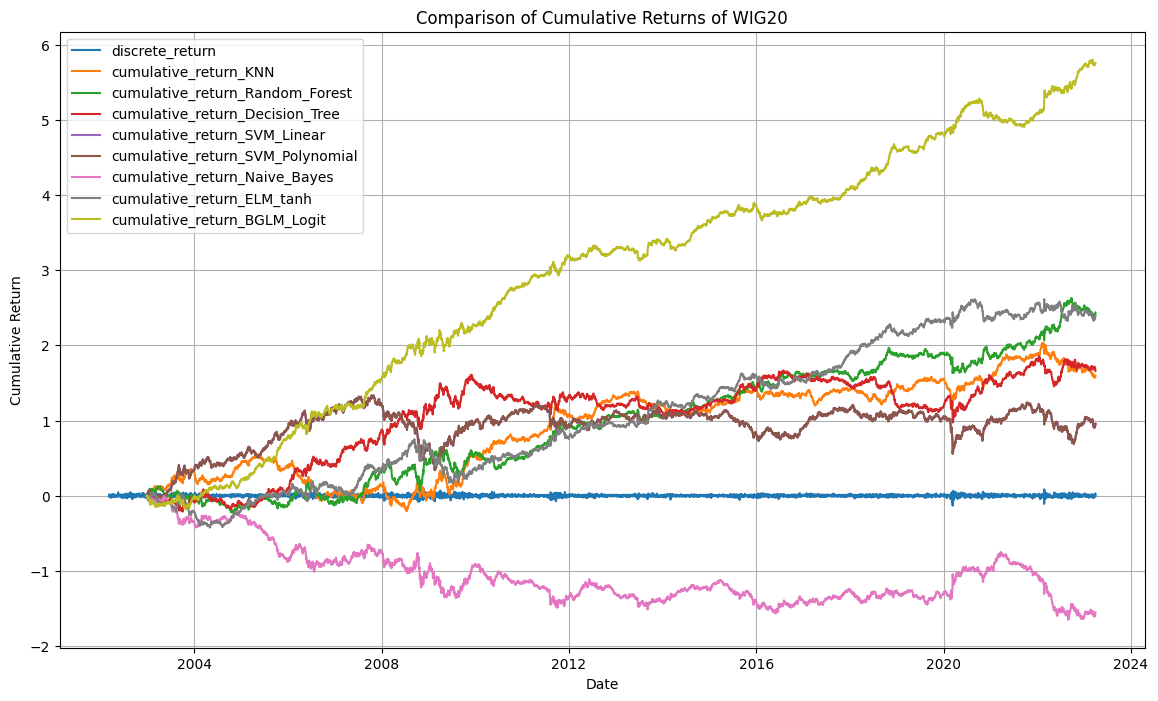

In [59]:
plt.figure(figsize=(14, 8))
for column in ['discrete_return', 'cumulative_return_KNN', 'cumulative_return_Random_Forest', 
               'cumulative_return_Decision_Tree', 'cumulative_return_SVM_Linear', 
               'cumulative_return_SVM_Polynomial', 'cumulative_return_Naive_Bayes', 
               'cumulative_return_ELM_tanh', 'cumulative_return_BGLM_Logit']:
    plt.plot(df_wig20[column], label=column)

plt.title('Comparison of Cumulative Returns of WIG20')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

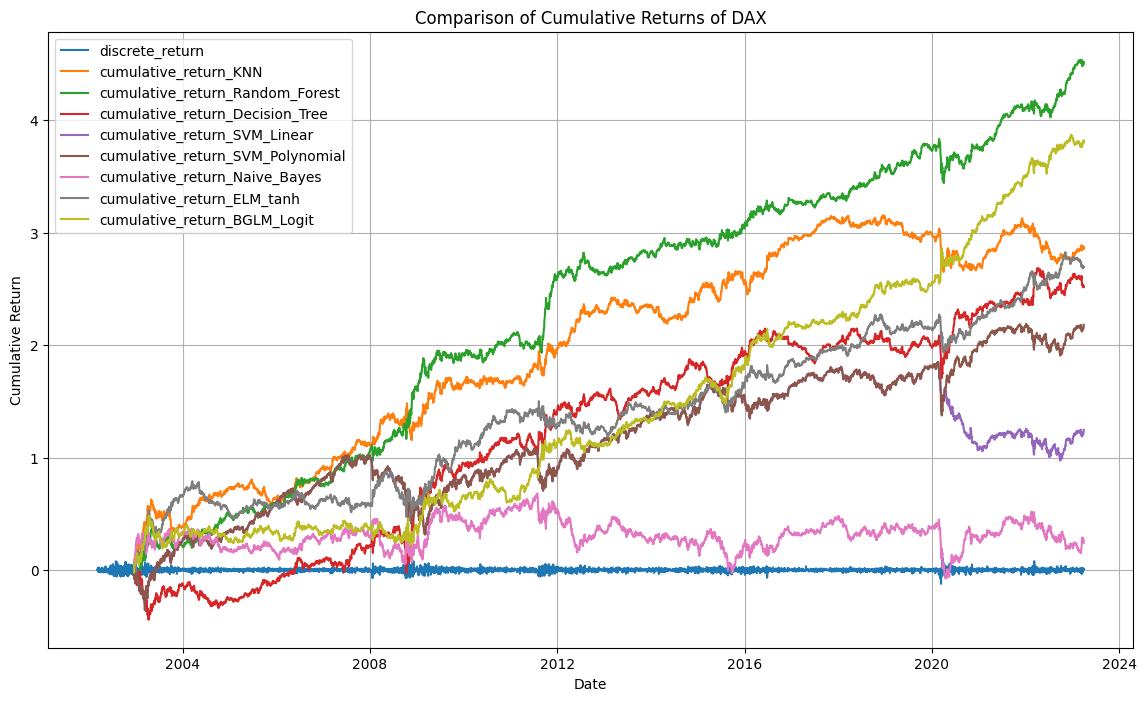

In [56]:
plt.figure(figsize=(14, 8))
for column in ['discrete_return', 'cumulative_return_KNN', 'cumulative_return_Random_Forest', 
               'cumulative_return_Decision_Tree', 'cumulative_return_SVM_Linear', 
               'cumulative_return_SVM_Polynomial', 'cumulative_return_Naive_Bayes', 
               'cumulative_return_ELM_tanh', 'cumulative_return_BGLM_Logit']:
    plt.plot(df_dax[column], label=column)

plt.title('Comparison of Cumulative Returns of DAX')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

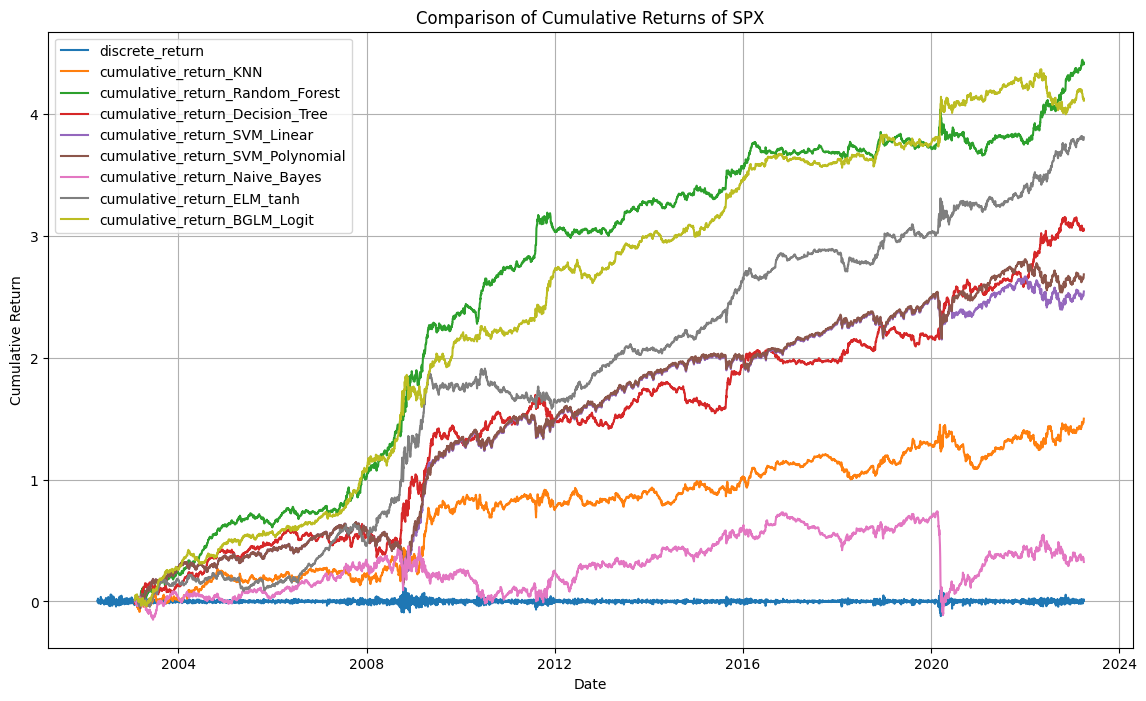

In [58]:
plt.figure(figsize=(14, 8))
for column in ['discrete_return', 'cumulative_return_KNN', 'cumulative_return_Random_Forest', 
               'cumulative_return_Decision_Tree', 'cumulative_return_SVM_Linear', 
               'cumulative_return_SVM_Polynomial', 'cumulative_return_Naive_Bayes', 
               'cumulative_return_ELM_tanh', 'cumulative_return_BGLM_Logit']:
    plt.plot(df_spx[column], label=column)

plt.title('Comparison of Cumulative Returns of SPX')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

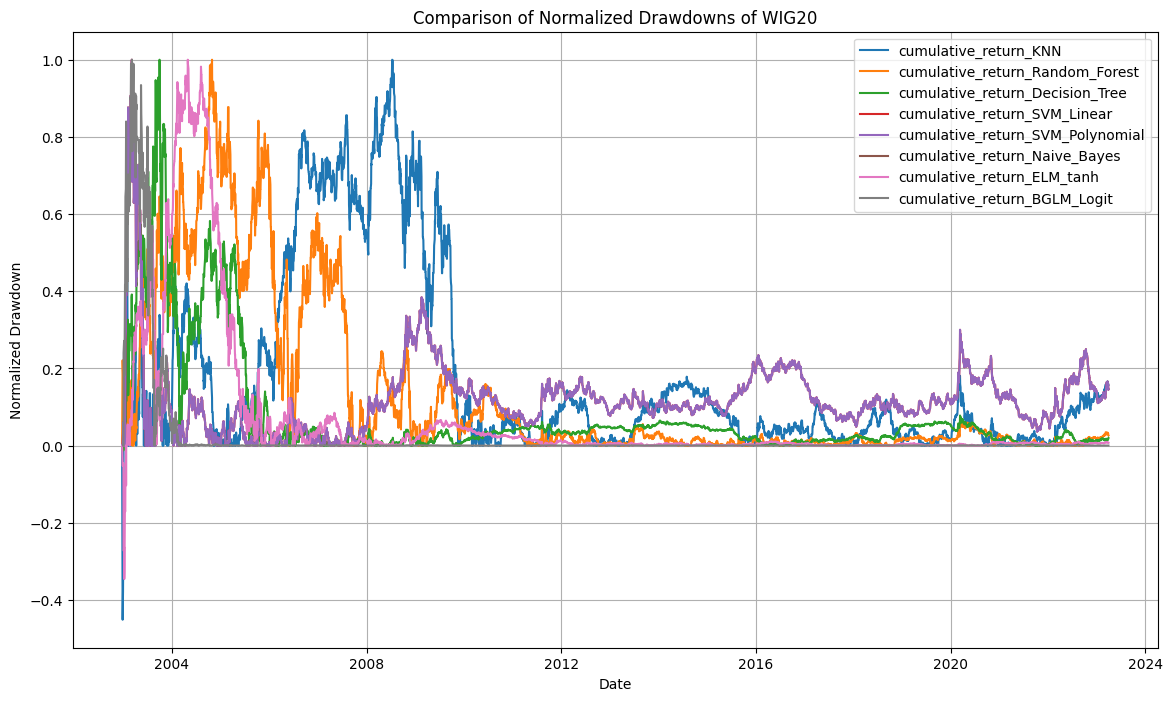

In [60]:
def calculate_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown

drawdowns = pd.DataFrame()
for column in ['cumulative_return_KNN', 'cumulative_return_Random_Forest', 
               'cumulative_return_Decision_Tree', 'cumulative_return_SVM_Linear', 
               'cumulative_return_SVM_Polynomial', 'cumulative_return_Naive_Bayes', 
               'cumulative_return_ELM_tanh', 'cumulative_return_BGLM_Logit']:
    drawdowns[column] = calculate_drawdown(df_wig20[column])

normalized_drawdowns = drawdowns / drawdowns.min()

plt.figure(figsize=(14, 8))
for column in normalized_drawdowns.columns:
    plt.plot(normalized_drawdowns[column], label=column)

plt.title('Comparison of Normalized Drawdowns of WIG20')
plt.xlabel('Date')
plt.ylabel('Normalized Drawdown')
plt.legend()
plt.grid(True)
plt.show()

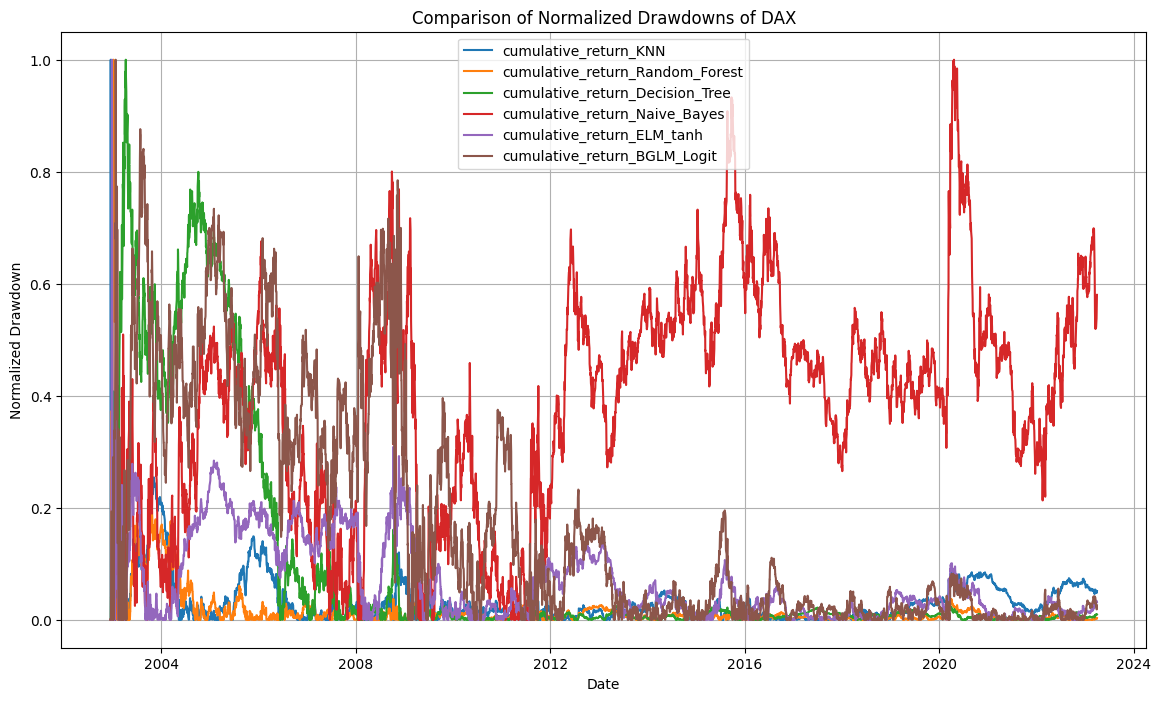

In [61]:
drawdowns = pd.DataFrame()
for column in ['cumulative_return_KNN', 'cumulative_return_Random_Forest', 
               'cumulative_return_Decision_Tree', 'cumulative_return_Naive_Bayes', 
               'cumulative_return_ELM_tanh', 'cumulative_return_BGLM_Logit']:
    drawdowns[column] = calculate_drawdown(df_dax[column])

normalized_drawdowns = drawdowns / drawdowns.min()

plt.figure(figsize=(14, 8))
for column in normalized_drawdowns.columns:
    plt.plot(normalized_drawdowns[column], label=column)

plt.title('Comparison of Normalized Drawdowns of DAX')
plt.xlabel('Date')
plt.ylabel('Normalized Drawdown')
plt.legend()
plt.grid(True)
plt.show()

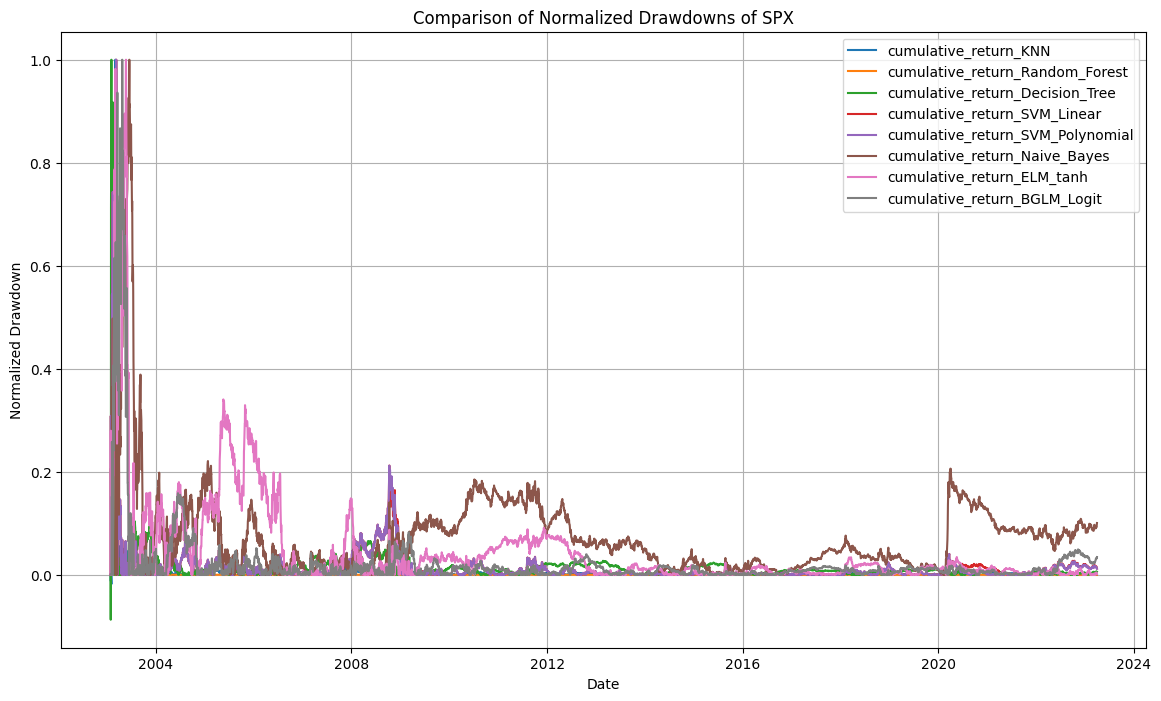

In [62]:
drawdowns = pd.DataFrame()
for column in ['cumulative_return_KNN', 'cumulative_return_Random_Forest', 
               'cumulative_return_Decision_Tree', 'cumulative_return_SVM_Linear', 
               'cumulative_return_SVM_Polynomial', 'cumulative_return_Naive_Bayes', 
               'cumulative_return_ELM_tanh', 'cumulative_return_BGLM_Logit']:
    drawdowns[column] = calculate_drawdown(df_spx[column])

normalized_drawdowns = drawdowns / drawdowns.min()

plt.figure(figsize=(14, 8))
for column in normalized_drawdowns.columns:
    plt.plot(normalized_drawdowns[column], label=column)

plt.title('Comparison of Normalized Drawdowns of SPX')
plt.xlabel('Date')
plt.ylabel('Normalized Drawdown')
plt.legend()
plt.grid(True)
plt.show()